<a href="https://colab.research.google.com/github/pranab-martiniapp/data-science-boot-camp/blob/main/Projects/Project_2/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction

## Problem Definition

This project delves into the analysis of housing data with the aim of predicting housing prices based on features of a house. The input variables' columns are all aspects of house. The data set has a target column, denoted as 'SalePrice,' which mean this will be a supervised learning problem.

We will use Linear Regression in predicting house prices.

## Data Source

This data comes from [Robert Citek](https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv). It contains data representing house prices and features of a house. The dataset contains a target column that signifies the sale price of the house. The goal is to use this data to train a model that can predict housing prices.

A data dictionary has also been provided for this data and can be found [here](https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv )

## Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# Disable ellipsis to display full contents of the DataFrame
pd.set_option('display.expand_frame_repr', False)

## Load Data

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv"
housing_data_src = pd.read_csv(url)

In [ ]:
housing_data_src.shape

(2637, 81)

In [ ]:
housing_data_src.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
housing_data_src.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


## Columns Considered For Training

The original dataset has 80 features and 1 target column. Of these 80 features there are 37 numerical features and 43 categorical features. Of these 80 features 34 (excluding the target) were selected as the initial feature space.

The initial feature space was arrived after analyzing the 80 features for Missing Values Ratio and Variance Threshold. The features that did not make it had either high number of nulls or a high number of identical values occupying the majority of the samples.

The analysis of this has been done in a seperate notebook in order to keep this one focused on the training of the model. Those notebooks can be provided upon request.

These initial feature set still needs to be cleaned, imputed, selected and scaled as part of the training and these operation will be done in this notebook.

In [ ]:
target_column_name = 'SalePrice'

target_column = ['SalePrice']

initial_numeric_columns = [
  'MS SubClass',
  'Lot Frontage',
  'Lot Area',
  'Overall Qual',
  'Overall Cond',
  'Year Built',
  'Year Remod/Add',
  'BsmtFin SF 1',
  'Bsmt Unf SF',
  'Total Bsmt SF',
  '1st Flr SF',
  'Gr Liv Area',
  'Full Bath',
  'Bedroom AbvGr',
  'Kitchen AbvGr',
  'TotRms AbvGrd',
  'Garage Yr Blt',
  'Garage Cars',
  'Garage Area',
  'Mo Sold',
  'Yr Sold',
]

initial_nominal_columns = [
  'Lot Config',
  'House Style',
  'Exterior 1st', # (data-dict name = Exterior 1)
  'Exterior 2nd', # (data-dict name = Exterior 2)
  'Mas Vnr Type', # missing data (none as an option exists)
  'Foundation',
  'Sale Type',
  'Garage Type',
]

initial_ordinal_columns = [
  'Lot Shape',
  'Exter Qual',
  'Bsmt Qual',  # missing data (NA as an option exists)
  'Heating QC', # (data-dict name = HeatingQC)
  'Kitchen Qual', # (data-dict name = KitchenQual)
]

initial_columns_for_train = target_column + initial_numeric_columns + initial_nominal_columns + initial_ordinal_columns

In [ ]:
initial_hdata = housing_data_src[initial_columns_for_train].copy()
initial_hdata.shape

(2637, 35)

## Data Cleaning

In [ ]:
hdata_clean = initial_hdata.copy()

In [ ]:
def display_columns_with_nulls_in_df(df):
  '''
    Given a dataframe df display all columns with nulls.
  '''
  columns_with_nulls = df.isnull().sum()
  columns_to_impute = columns_with_nulls[ columns_with_nulls > 0 ]
  return columns_to_impute

In [ ]:
display_columns_with_nulls_in_df(hdata_clean)

Lot Frontage     449
BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Yr Blt    147
Garage Cars        1
Garage Area        1
Mas Vnr Type      23
Garage Type      145
Bsmt Qual         73
dtype: int64

Lets take care of `Lot Frontage` first.

In [ ]:
# Let us fill the lot frontage nulls with the mean of the column
avg_lot_frontage = hdata_clean['Lot Frontage'].mean()
avg_lot_frontage

69.16681901279708

In [ ]:
hdata_clean['Lot Frontage'].fillna(avg_lot_frontage, inplace=True)

In [ ]:
display_columns_with_nulls_in_df(hdata_clean)

BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Yr Blt    147
Garage Cars        1
Garage Area        1
Mas Vnr Type      23
Garage Type      145
Bsmt Qual         73
dtype: int64

Let's fix `Mas Vnr Type` next.

In [ ]:
hdata_clean['Mas Vnr Type'].value_counts()

None       1584
BrkFace     782
Stone       224
BrkCmn       23
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [ ]:
# The data dictionary defines None is a valid value when there is no Masonary Veneer Type
hdata_clean['Mas Vnr Type'].fillna(value='None', inplace=True)

In [ ]:
display_columns_with_nulls_in_df(hdata_clean)

BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Yr Blt    147
Garage Cars        1
Garage Area        1
Garage Type      145
Bsmt Qual         73
dtype: int64

In [ ]:
hdata_clean['Bsmt Qual'].value_counts()

TA    1161
Gd    1093
Ex     229
Fa      79
Po       2
Name: Bsmt Qual, dtype: int64

In [ ]:
# The data dictoinary defines NA is a valid value when there is no Basement
hdata_clean['Bsmt Qual'].fillna(value='NA', inplace=True)

In [ ]:
columns_with_nulls = display_columns_with_nulls_in_df(hdata_clean)
columns_with_nulls

BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Yr Blt    147
Garage Cars        1
Garage Area        1
Garage Type      145
dtype: int64

In [ ]:
# Based on the above data it feels some of the columns being null
# are all on one row. Lets check that.

columns_with_one_null = columns_with_nulls[ columns_with_nulls == 1 ]
index_list = []
for column_name in columns_with_one_null.index:
  index_list.append(hdata_clean[hdata_clean[column_name].isnull()].index)
index_list

[Int64Index([847], dtype='int64'),
 Int64Index([847], dtype='int64'),
 Int64Index([847], dtype='int64'),
 Int64Index([329], dtype='int64'),
 Int64Index([329], dtype='int64')]

In [ ]:
hdata_clean.loc[847]

SalePrice           79000
MS SubClass            20
Lot Frontage         99.0
Lot Area             5940
Overall Qual            4
Overall Cond            7
Year Built           1946
Year Remod/Add       1950
BsmtFin SF 1          NaN
Bsmt Unf SF           NaN
Total Bsmt SF         NaN
1st Flr SF            896
Gr Liv Area           896
Full Bath               1
Bedroom AbvGr           2
Kitchen AbvGr           1
TotRms AbvGrd           4
Garage Yr Blt      1946.0
Garage Cars           1.0
Garage Area         280.0
Mo Sold                 4
Yr Sold              2008
Lot Config            FR3
House Style        1Story
Exterior 1st      MetalSd
Exterior 2nd       CBlock
Mas Vnr Type         None
Foundation          PConc
Sale Type           ConLD
Garage Type        Detchd
Lot Shape             IR1
Exter Qual             TA
Bsmt Qual              NA
Heating QC             TA
Kitchen Qual           TA
Name: 847, dtype: object

In [ ]:
hdata_clean['Total Bsmt SF'].value_counts()

0.0       72
864.0     69
1040.0    24
768.0     24
672.0     23
          ..
1331.0     1
1978.0     1
1380.0     1
1385.0     1
1377.0     1
Name: Total Bsmt SF, Length: 1001, dtype: int64

In [ ]:
hdata_clean['Bsmt Unf SF'].value_counts()

0.0       219
384.0      18
728.0      13
600.0      12
216.0      11
         ... 
929.0       1
1721.0      1
1544.0      1
1497.0      1
1097.0      1
Name: Bsmt Unf SF, Length: 1080, dtype: int64

In [ ]:
hdata_clean['BsmtFin SF 1'].value_counts()

0.0       840
24.0       23
16.0       12
300.0       8
700.0       7
         ... 
1571.0      1
683.0       1
978.0       1
482.0       1
1098.0      1
Name: BsmtFin SF 1, Length: 935, dtype: int64

Based on the above, `BsmtFin SF 1`, `Bsmt Unf SF` and `Total Bsmt SF` are all null on the same row. Furthermore, `Bsmt Qual` is NA which means there is no basement. So we will fill these null values with `0` since `0` as a value does exist in these columsn.

In [ ]:
hdata_clean['BsmtFin SF 1'].fillna(value=0.0, inplace=True)
hdata_clean['Bsmt Unf SF'].fillna(value=0.0, inplace=True)
hdata_clean['Total Bsmt SF'].fillna(value=0.0, inplace=True)

In [ ]:
columns_with_nulls = display_columns_with_nulls_in_df(hdata_clean)
columns_with_nulls

Garage Yr Blt    147
Garage Cars        1
Garage Area        1
Garage Type      145
dtype: int64

In [ ]:
# Based on the above data it feels some of the columns being null
# are all on one row. Lets check that.

columns_with_one_null = columns_with_nulls[ columns_with_nulls == 1 ]
index_list = []
for column_name in columns_with_one_null.index:
  index_list.append(hdata_clean[hdata_clean[column_name].isnull()].index)
index_list

[Int64Index([329], dtype='int64'), Int64Index([329], dtype='int64')]

In [ ]:
hdata_clean.loc[329]

SalePrice          150909
MS SubClass            70
Lot Frontage         50.0
Lot Area             9060
Overall Qual            5
Overall Cond            6
Year Built           1923
Year Remod/Add       1999
BsmtFin SF 1        548.0
Bsmt Unf SF         311.0
Total Bsmt SF       859.0
1st Flr SF            942
Gr Liv Area          1828
Full Bath               2
Bedroom AbvGr           3
Kitchen AbvGr           1
TotRms AbvGrd           6
Garage Yr Blt         NaN
Garage Cars           NaN
Garage Area           NaN
Mo Sold                 3
Yr Sold              2007
Lot Config         Inside
House Style        2Story
Exterior 1st      Wd Sdng
Exterior 2nd      Plywood
Mas Vnr Type         None
Foundation         BrkTil
Sale Type             WD 
Garage Type        Detchd
Lot Shape             Reg
Exter Qual             TA
Bsmt Qual              Gd
Heating QC             Ex
Kitchen Qual           Gd
Name: 329, dtype: object

In [ ]:
hdata_clean['Garage Yr Blt'].value_counts()

2005.0    129
2007.0    105
2006.0    100
2004.0     86
2003.0     84
         ... 
1908.0      1
1895.0      1
1917.0      1
2207.0      1
1896.0      1
Name: Garage Yr Blt, Length: 102, dtype: int64

In [ ]:
hdata_clean['Garage Cars'].value_counts()

2.0    1449
1.0     696
3.0     331
0.0     145
4.0      14
5.0       1
Name: Garage Cars, dtype: int64

In [ ]:
hdata_clean['Garage Area'].value_counts()

0.0      145
576.0     91
440.0     89
484.0     71
240.0     59
        ... 
162.0      1
662.0      1
682.0      1
455.0      1
207.0      1
Name: Garage Area, Length: 576, dtype: int64

There is an interesting pattern here. There are 145 entries here with 0 `Garage Car`, 0 `Garage Area`, and there are 145 nulls in `Garage Type`.

Let us drop all rows where `Garage Car` is 0, `Garage Area` is 0 and `Garage Type` is null. This should also potentially clear 145 entries in the 147 missing `Garage Yr Blt`.

In [ ]:
garage_with_no_cars = hdata_clean['Garage Cars'] == 0.0
garage_with_no_area = hdata_clean['Garage Area'] == 0.0
garage_with_type_null = hdata_clean['Garage Type'].isnull()
hdata_clean[garage_with_no_cars & garage_with_no_area & garage_with_type_null]['Garage Yr Blt'].isnull()

42      True
52      True
71      True
82      True
84      True
        ... 
2556    True
2567    True
2603    True
2604    True
2608    True
Name: Garage Yr Blt, Length: 145, dtype: bool

In [ ]:
house_with_out_garages = hdata_clean[garage_with_no_cars & garage_with_no_area & garage_with_type_null]
house_with_out_garages.shape

(145, 35)

In [ ]:
# Drop all rows where Garage Cars and Garage Area is 0 and Garage Type is null
hdata_clean.drop(house_with_out_garages.index, inplace=True)
hdata_clean.shape

(2492, 35)

In [ ]:
columns_with_nulls = display_columns_with_nulls_in_df(hdata_clean)
columns_with_nulls

Garage Yr Blt    2
Garage Cars      1
Garage Area      1
dtype: int64

In [ ]:
hdata_clean[hdata_clean['Garage Cars'].isnull() & hdata_clean['Garage Area'].isnull()]

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,...,Exterior 2nd,Mas Vnr Type,Foundation,Sale Type,Garage Type,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual
329,150909,70,50.0,9060,5,6,1923,1999,548.0,311.0,...,Plywood,None,BrkTil,WD,Detchd,Reg,TA,Gd,Ex,Gd


In [ ]:
hdata_clean.loc[329]

SalePrice          150909
MS SubClass            70
Lot Frontage         50.0
Lot Area             9060
Overall Qual            5
Overall Cond            6
Year Built           1923
Year Remod/Add       1999
BsmtFin SF 1        548.0
Bsmt Unf SF         311.0
Total Bsmt SF       859.0
1st Flr SF            942
Gr Liv Area          1828
Full Bath               2
Bedroom AbvGr           3
Kitchen AbvGr           1
TotRms AbvGrd           6
Garage Yr Blt         NaN
Garage Cars           NaN
Garage Area           NaN
Mo Sold                 3
Yr Sold              2007
Lot Config         Inside
House Style        2Story
Exterior 1st      Wd Sdng
Exterior 2nd      Plywood
Mas Vnr Type         None
Foundation         BrkTil
Sale Type             WD 
Garage Type        Detchd
Lot Shape             Reg
Exter Qual             TA
Bsmt Qual              Gd
Heating QC             Ex
Kitchen Qual           Gd
Name: 329, dtype: object

In [ ]:
hdata_clean[hdata_clean['Garage Yr Blt'].isnull()]

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,...,Exterior 2nd,Mas Vnr Type,Foundation,Sale Type,Garage Type,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual
162,160000,60,57.0,8094,6,8,1910,1983,196.0,1046.0,...,Wd Sdng,None,PConc,WD,Detchd,Reg,TA,TA,Gd,TA
329,150909,70,50.0,9060,5,6,1923,1999,548.0,311.0,...,Plywood,None,BrkTil,WD,Detchd,Reg,TA,Gd,Ex,Gd


In [ ]:
hdata_clean.loc[162]

SalePrice          160000
MS SubClass            60
Lot Frontage         57.0
Lot Area             8094
Overall Qual            6
Overall Cond            8
Year Built           1910
Year Remod/Add       1983
BsmtFin SF 1        196.0
Bsmt Unf SF        1046.0
Total Bsmt SF      1242.0
1st Flr SF           1242
Gr Liv Area          1984
Full Bath               2
Bedroom AbvGr           5
Kitchen AbvGr           1
TotRms AbvGrd           8
Garage Yr Blt         NaN
Garage Cars           1.0
Garage Area         360.0
Mo Sold                 9
Yr Sold              2008
Lot Config         Inside
House Style        2.5Unf
Exterior 1st      Wd Sdng
Exterior 2nd      Wd Sdng
Mas Vnr Type         None
Foundation          PConc
Sale Type             WD 
Garage Type        Detchd
Lot Shape             Reg
Exter Qual             TA
Bsmt Qual              TA
Heating QC             Gd
Kitchen Qual           TA
Name: 162, dtype: object

The row with index 329 has no values for `Garage Car`, `Garage Area` and `Garage Yr Blt` while `Garage Type` is detached. Whereas row with index 162 is just missing `Garage Yr Blt`. So lets drop row index 329 and impute `Garage Yr Blt` for row 162.

In [ ]:
hdata_clean.drop([329], inplace=True)
hdata_clean.shape

(2491, 35)

In [ ]:
display_columns_with_nulls_in_df(hdata_clean)

Garage Yr Blt    1
dtype: int64

Lets look at rows above and below the row (index = 162) in question.

In [ ]:
hdata_clean.loc[147:178][['Year Built', 'Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
147,2006,2006,2006.0
148,2002,2002,2002.0
149,1987,1989,1987.0
150,1977,1977,1977.0
151,2006,2007,2006.0
152,1973,1973,1973.0
153,1994,1995,2000.0
154,1958,1958,1958.0
155,1939,1950,1939.0
156,1932,2000,1968.0


This cursory glance shows us that grage built year and house built year generally match. So lets us that to fill the null.

In [ ]:
hdata_clean.loc[162]['Year Built']

1910

In [ ]:
hdata_clean['Garage Yr Blt'].fillna(value=hdata_clean.loc[162]['Year Built'], inplace=True)

In [ ]:
display_columns_with_nulls_in_df(hdata_clean)

Series([], dtype: int64)

In [ ]:
hdata_clean.shape

(2491, 35)

## Check Target Data

In [ ]:
hdata_clean['SalePrice'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2491 entries, 0 to 2636
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
2491 non-null   int64
dtypes: int64(1)
memory usage: 103.5 KB


In [ ]:
hdata_clean['SalePrice'].value_counts()

140000    31
135000    29
130000    26
155000    24
145000    21
          ..
295000     1
281500     1
279700     1
138887     1
211500     1
Name: SalePrice, Length: 948, dtype: int64

In [ ]:
hdata_clean['SalePrice'].describe()

count      2491.000000
mean     184406.020474
std       77918.264753
min       12789.000000
25%      132750.000000
50%      165000.000000
75%      215450.000000
max      745000.000000
Name: SalePrice, dtype: float64

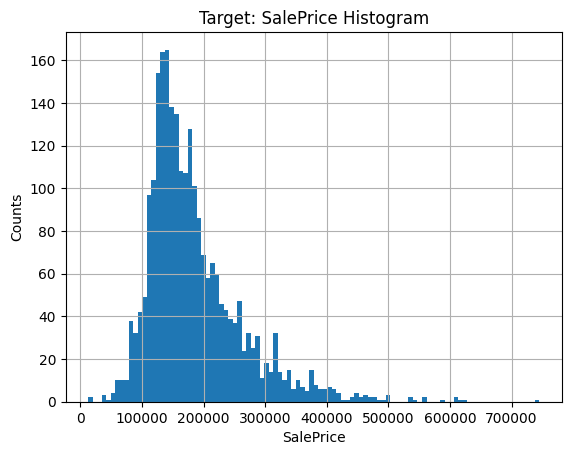

In [ ]:
ax = hdata_clean['SalePrice'].hist(bins=100)
# Set xlabel, ylabel, and title
ax.set_xlabel("SalePrice")
ax.set_ylabel("Counts")
ax.set_title("Target: SalePrice Histogram");

All the data in the target is present (no nulls). All values are numerical in nature. Most values also seem to be in the 100k to 400k range of prices. We will see if this is significant later.

## Encode Categorical Data

In [ ]:
hdata_clean_ordinal_clmns = hdata_clean[initial_ordinal_columns].copy()
hdata_clean_ordinal_clmns.shape

(2491, 5)

In [ ]:
hdata_clean_nominal_clmns = hdata_clean[initial_nominal_columns].copy()
hdata_clean_nominal_clmns.shape

(2491, 8)

### Encode Ordinal Data

In [ ]:
hdata_clean_ordinal_clmns.head()

,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual
0,Reg,TA,TA,TA,TA
1,Reg,TA,NA,TA,TA
2,Reg,TA,TA,TA,Gd
3,IR1,Gd,Gd,Ex,Gd
4,Reg,Gd,Gd,Ex,Gd


In [ ]:
hdata_clean_ordinal_clmns.tail()

,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual
2632,Reg,TA,TA,TA,TA
2633,IR1,Gd,Gd,Gd,Gd
2634,IR1,Gd,Gd,TA,Gd
2635,Reg,TA,Gd,TA,TA
2636,IR1,Gd,Gd,Ex,TA


In [ ]:
# Create instance of labelencoder
labelencoder = LabelEncoder()

In [ ]:
for column_name in initial_ordinal_columns:
  # Assign numerical values and store in another column
  encoded_colum_name = f"{column_name} Encoded"
  hdata_clean_ordinal_clmns[encoded_colum_name] = labelencoder.fit_transform(hdata_clean_ordinal_clmns[column_name])
#end-for

hdata_clean_ordinal_clmns.shape

(2491, 10)

In [ ]:
hdata_clean_ordinal_clmns.head()

,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
0,Reg,TA,TA,TA,TA,3,3,5,4,3
1,Reg,TA,NA,TA,TA,3,3,3,4,3
2,Reg,TA,TA,TA,Gd,3,3,5,4,2
3,IR1,Gd,Gd,Ex,Gd,0,2,2,0,2
4,Reg,Gd,Gd,Ex,Gd,3,2,2,0,2


In [ ]:
hdata_clean_ordinal_clmns.tail()

,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
2632,Reg,TA,TA,TA,TA,3,3,5,4,3
2633,IR1,Gd,Gd,Gd,Gd,0,2,2,2,2
2634,IR1,Gd,Gd,TA,Gd,0,2,2,4,2
2635,Reg,TA,Gd,TA,TA,3,3,2,4,3
2636,IR1,Gd,Gd,Ex,TA,0,2,2,0,3


In [ ]:
hdata_clean_ordinal_clmns.apply(pd.Series.value_counts)

,Lot Shape,Exter Qual,Bsmt Qual,Heating QC,Kitchen Qual,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
0,NaN,NaN,NaN,NaN,NaN,876.0,96.0,229.0,1314.0,181.0
1,NaN,NaN,NaN,NaN,NaN,65.0,19.0,65.0,66.0,39.0
2,NaN,NaN,NaN,NaN,NaN,14.0,886.0,1060.0,391.0,1032.0
3,NaN,NaN,NaN,NaN,NaN,1536.0,1490.0,60.0,3.0,1239.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,717.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.0,NaN,NaN
Ex,NaN,96.0,229.0,1314.0,181.0,NaN,NaN,NaN,NaN,NaN
Fa,NaN,19.0,65.0,66.0,39.0,NaN,NaN,NaN,NaN,NaN
Gd,NaN,886.0,1060.0,391.0,1032.0,NaN,NaN,NaN,NaN,NaN
IR1,876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reviewing the above dataframe we can see all the ordinal columns have been encoded. Lets drop the non-encoded ordinal columns.

In [ ]:
hdata_clean_ordinal_clmns.drop(columns=initial_ordinal_columns, inplace=True)
hdata_clean_ordinal_clmns.shape

(2491, 5)

In [ ]:
hdata_clean_ordinal_clmns.head()

,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
0,3,3,5,4,3
1,3,3,3,4,3
2,3,3,5,4,2
3,0,2,2,0,2
4,3,2,2,0,2


In [ ]:
hdata_clean_ordinal_clmns.tail()

,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
2632,3,3,5,4,3
2633,0,2,2,2,2
2634,0,2,2,4,2
2635,3,3,2,4,3
2636,0,2,2,0,3


### Encode Nominal Data

In [ ]:
hdata_clean_nominal_clmns.head()

,Lot Config,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Sale Type,Garage Type
0,Inside,1Story,HdBoard,HdBoard,None,CBlock,WD,Detchd
1,Inside,1Story,MetalSd,MetalSd,None,Slab,WD,CarPort
2,Inside,1.5Fin,Wd Sdng,Wd Sdng,None,PConc,WD,Detchd
3,Inside,2Story,VinylSd,VinylSd,None,PConc,WD,Attchd
4,Inside,2Story,Wd Sdng,Wd Sdng,None,PConc,WD,Detchd


In [ ]:
hdata_clean_nominal_clmns.tail()

,Lot Config,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Sale Type,Garage Type
2632,Inside,1.5Fin,Wd Sdng,Wd Sdng,None,PConc,WD,Detchd
2633,Inside,SLvl,HdBoard,HdBoard,None,PConc,WD,Attchd
2634,CulDSac,1Story,Wd Sdng,Plywood,None,CBlock,WD,Attchd
2635,Inside,1Story,HdBoard,HdBoard,BrkFace,CBlock,WD,Attchd
2636,FR2,2Story,VinylSd,VinylSd,None,PConc,WD,BuiltIn


In [ ]:
hdata_clean_nominal_clmns = pd.get_dummies(hdata_clean_nominal_clmns, columns=initial_nominal_columns, prefix=initial_nominal_columns, prefix_sep='_')
hdata_clean_nominal_clmns.shape

(2491, 70)

In [ ]:
hdata_clean_nominal_clmns.columns

Index(['Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2',
       'Lot Config_FR3', 'Lot Config_Inside', 'House Style_1.5Fin',
       'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin',
       'House Style_2.5Unf', 'House Style_2Story', 'House Style_SFoyer',
       'House Style_SLvl', 'Exterior 1st_AsbShng', 'Exterior 1st_BrkComm',
       'Exterior 1st_BrkFace', 'Exterior 1st_CBlock', 'Exterior 1st_CemntBd',
       'Exterior 1st_HdBoard', 'Exterior 1st_ImStucc', 'Exterior 1st_MetalSd',
       'Exterior 1st_Plywood', 'Exterior 1st_Stone', 'Exterior 1st_Stucco',
       'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Exterior 1st_WdShing',
       'Exterior 2nd_AsbShng', 'Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn',
       'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd',
       'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd',
       'Exterior 2nd_Other', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stone',
       'Exterior 2nd

Reviewing the above series we can see all the nominal columns have been encoded.

### Merge Nominal & Ordinal Encoded Columns

In [ ]:
hdata_clean_nominal_clmns.shape

(2491, 70)

In [ ]:
hdata_clean_ordinal_clmns.shape

(2491, 5)

In [ ]:
hdata_clean_encoded = pd.merge(hdata_clean_nominal_clmns, hdata_clean_ordinal_clmns, left_index=True, right_index=True)
hdata_clean_encoded.shape

(2491, 75)

In [ ]:
hdata_clean_encoded.head()

,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,...,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,3,3,5,4,3
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,3,3,3,4,3
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,3,3,5,4,2
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,2,2,0,2
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,3,2,2,0,2


In [ ]:
hdata_clean_encoded.tail()

,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,...,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
2632,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,3,3,5,4,3
2633,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,2,2,2,2
2634,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,2,2,4,2
2635,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,3,3,2,4,3
2636,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,2,0,3


## Feature Selection

### Select Numerical Features

In [ ]:
numeric_columns = initial_numeric_columns + target_column
hdata_clean_numeric_clmns = hdata_clean[numeric_columns].copy()
hdata_clean_numeric_clmns.shape

(2491, 22)

In [ ]:
hdata_clean_numeric_clmns.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Full Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Mo Sold,Yr Sold,SalePrice
0,20,62.0,14299,4,3,1964,1964,513.0,348.0,1005.0,...,1,3,1,5,1964.0,2.0,440.0,7,2007,115400
1,90,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,...,2,2,2,6,1967.0,2.0,516.0,10,2006,90000
2,50,50.0,9000,6,6,1937,1950,0.0,780.0,780.0,...,1,3,1,6,1979.0,1.0,544.0,12,2007,141000
3,60,68.0,7379,8,5,2000,2000,484.0,491.0,975.0,...,2,3,1,7,2000.0,2.0,592.0,4,2010,254000
4,70,60.0,7200,7,9,1936,2007,350.0,0.0,560.0,...,1,3,1,6,1971.0,2.0,576.0,4,2009,155000


In [ ]:
hdata_clean_numeric_clmns.tail()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Full Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Mo Sold,Yr Sold,SalePrice
2632,50,52.0,6240,6,6,1934,1950,0.0,816.0,816.0,...,1,3,1,6,1985.0,2.0,528.0,9,2006,114500
2633,80,74.0,10778,7,6,1990,1991,460.0,308.0,1054.0,...,1,1,1,4,1990.0,2.0,462.0,7,2009,162000
2634,120,61.0,3782,8,5,1981,1981,960.0,266.0,1226.0,...,1,1,1,4,1981.0,2.0,484.0,9,2009,211500
2635,20,78.0,10140,6,5,1974,1974,0.0,1064.0,1064.0,...,2,3,1,7,1974.0,2.0,478.0,8,2009,165000
2636,60,41.0,12460,7,5,1999,2000,870.0,167.0,1037.0,...,2,4,1,8,1999.0,2.0,400.0,5,2008,225000


#### Check Correlation To Target

In [ ]:
hdata_clean_numeric_clmns.corr()['SalePrice'].abs().sort_values(ascending = False)

SalePrice         1.000000
Overall Qual      0.801144
Gr Liv Area       0.709678
Garage Cars       0.644565
Total Bsmt SF     0.624366
Garage Area       0.622870
1st Flr SF        0.613905
Year Built        0.552553
Full Bath         0.547376
Year Remod/Add    0.536885
Garage Yr Blt     0.529335
TotRms AbvGrd     0.510577
BsmtFin SF 1      0.419050
Lot Frontage      0.337665
Lot Area          0.254715
Bsmt Unf SF       0.178472
Bedroom AbvGr     0.137603
Overall Cond      0.129956
Kitchen AbvGr     0.099507
MS SubClass       0.060168
Mo Sold           0.054307
Yr Sold           0.028162
Name: SalePrice, dtype: float64

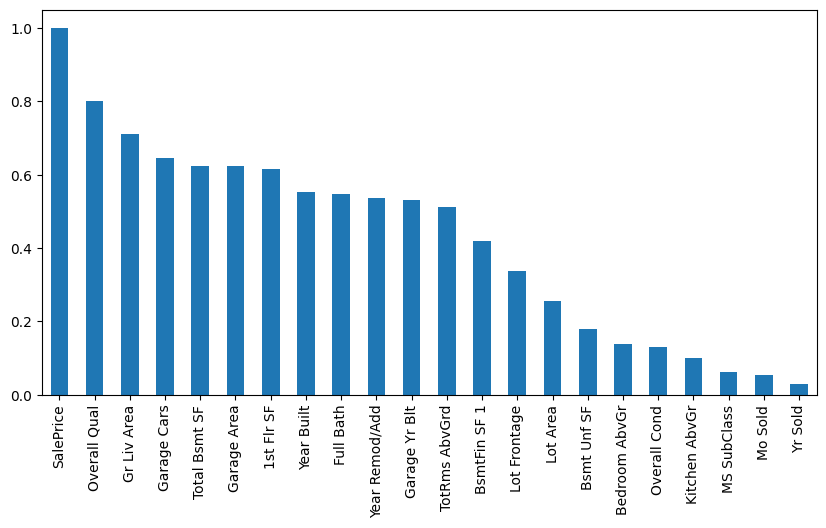

In [ ]:
# Plot result
hdata_clean_numeric_clmns.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;

In [ ]:
corrs = hdata_clean_numeric_clmns.corr()['SalePrice'].abs().sort_values(ascending = False)
numeric_clmn_keep = corrs[(corrs>.5)]
numeric_clmn_keep

SalePrice         1.000000
Overall Qual      0.801144
Gr Liv Area       0.709678
Garage Cars       0.644565
Total Bsmt SF     0.624366
Garage Area       0.622870
1st Flr SF        0.613905
Year Built        0.552553
Full Bath         0.547376
Year Remod/Add    0.536885
Garage Yr Blt     0.529335
TotRms AbvGrd     0.510577
Name: SalePrice, dtype: float64

#### Check Correlation Amongst Features Selected

In [ ]:
hdata_numeric_high_corr_clmns = hdata_clean_numeric_clmns[numeric_clmn_keep.index].copy()
hdata_numeric_high_corr_clmns.shape

(2491, 12)

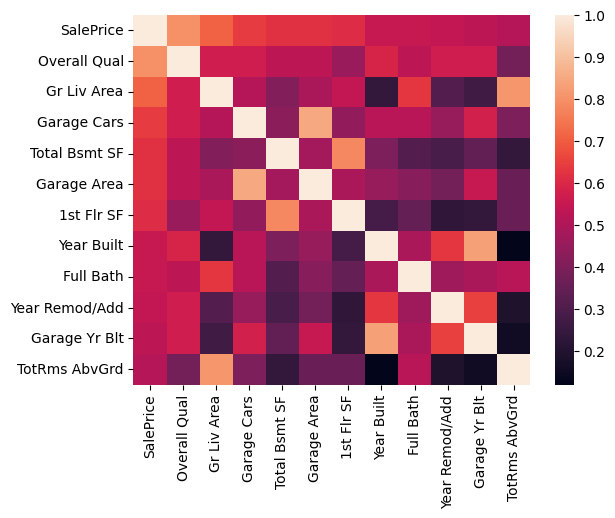

In [ ]:
correlation_matrix = hdata_numeric_high_corr_clmns.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=False) ;

In [ ]:
corr_unstacked = correlation_matrix.unstack()
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

SalePrice      Overall Qual      0.80
               Gr Liv Area       0.71
               Garage Cars       0.64
               Total Bsmt SF     0.62
               Garage Area       0.62
                                 ... 
TotRms AbvGrd  1st Flr SF        0.36
               Year Built        0.12
               Full Bath         0.52
               Year Remod/Add    0.19
               Garage Yr Blt     0.16
Length: 132, dtype: float64

In [ ]:
feature_corr_values = corr_unstacked_not_self.loc[numeric_clmn_keep.index, numeric_clmn_keep.index]
feature_corr_values

SalePrice      Overall Qual      0.80
               Gr Liv Area       0.71
               Garage Cars       0.64
               Total Bsmt SF     0.62
               Garage Area       0.62
                                 ... 
TotRms AbvGrd  1st Flr SF        0.36
               Year Built        0.12
               Full Bath         0.52
               Year Remod/Add    0.19
               Garage Yr Blt     0.16
Length: 132, dtype: float64

In [ ]:
feature_corr_values[feature_corr_values.abs() > 0.55].sort_values(ascending = False)

Garage Area     Garage Cars       0.85
Garage Cars     Garage Area       0.85
Garage Yr Blt   Year Built        0.83
Year Built      Garage Yr Blt     0.83
TotRms AbvGrd   Gr Liv Area       0.81
Gr Liv Area     TotRms AbvGrd     0.81
SalePrice       Overall Qual      0.80
Overall Qual    SalePrice         0.80
1st Flr SF      Total Bsmt SF     0.78
Total Bsmt SF   1st Flr SF        0.78
Gr Liv Area     SalePrice         0.71
SalePrice       Gr Liv Area       0.71
Garage Yr Blt   Year Remod/Add    0.65
Year Remod/Add  Garage Yr Blt     0.65
SalePrice       Garage Cars       0.64
Garage Cars     SalePrice         0.64
Year Remod/Add  Year Built        0.63
Year Built      Year Remod/Add    0.63
Gr Liv Area     Full Bath         0.63
Full Bath       Gr Liv Area       0.63
Garage Area     SalePrice         0.62
SalePrice       Garage Area       0.62
                Total Bsmt SF     0.62
Total Bsmt SF   SalePrice         0.62
1st Flr SF      SalePrice         0.61
SalePrice       1st Flr S

In [ ]:
corr_unstacked_not_self['SalePrice'].abs().sort_values(ascending = False)

Overall Qual      0.80
Gr Liv Area       0.71
Garage Cars       0.64
Total Bsmt SF     0.62
Garage Area       0.62
1st Flr SF        0.61
Year Built        0.55
Full Bath         0.55
Year Remod/Add    0.54
Garage Yr Blt     0.53
TotRms AbvGrd     0.51
dtype: float64

#### Final Numeric Column Selection For Training

The following columns are selected based on their correaltion to the target and their correaltion to each other.

In [ ]:
final_numeric_clmns = [
  'SalePrice',
  'Overall Qual',
  'Gr Liv Area',
  'Garage Cars',
  'Total Bsmt SF',
  'Year Built',
  'Full Bath',
  'Year Remod/Add',
]

In [ ]:
hdata_numeric_for_train = hdata_clean_numeric_clmns[final_numeric_clmns].copy()
hdata_numeric_for_train.shape

(2491, 8)

In [ ]:
hdata_numeric_for_train.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add
0,115400,4,1005,2.0,1005.0,1964,1,1964
1,90000,4,1296,2.0,0.0,1967,2,1967
2,141000,6,1375,1.0,780.0,1937,1,1950
3,254000,8,1848,2.0,975.0,2000,2,2000
4,155000,7,1135,2.0,560.0,1936,1,2007


### Select Categorical Features

In [ ]:
hdata_clean_encoded.head()

,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,...,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Lot Shape Encoded,Exter Qual Encoded,Bsmt Qual Encoded,Heating QC Encoded,Kitchen Qual Encoded
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,3,3,5,4,3
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,3,3,3,4,3
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,3,3,5,4,2
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,2,2,0,2
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,3,2,2,0,2


#### Run ANOVA

In [ ]:
y_for_anova = hdata_numeric_for_train['SalePrice'].copy()
y_for_anova.shape

(2491,)

In [ ]:
y_for_anova.head()

0    115400
1     90000
2    141000
3    254000
4    155000
Name: SalePrice, dtype: int64

<Axes: >

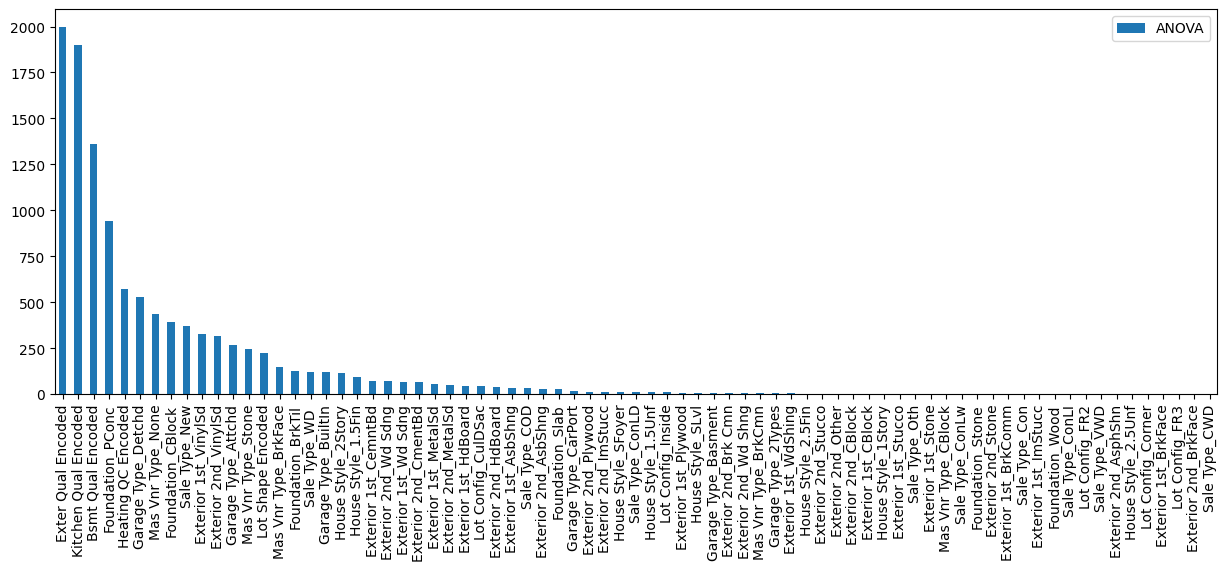

In [ ]:
fvalue_selector = SelectKBest(f_regression, k='all')  #select features best ANOVA F-Values
fvalue_selector.fit_transform(hdata_clean_encoded, y_for_anova)

# Plot results
results = pd.DataFrame({'ANOVA': fvalue_selector.scores_}, index = hdata_clean_encoded.columns)
results.sort_values(by = 'ANOVA', ascending = False).plot(kind = 'bar', figsize = (15,5))

In [ ]:
# Just keep the results with F-values greater than 20
anova = results.sort_values(by = 'ANOVA', ascending = False)
anova['ANOVA'][anova['ANOVA'] > 20]

Exter Qual Encoded      1994.710457
Kitchen Qual Encoded    1896.991796
Bsmt Qual Encoded       1361.333259
Foundation_PConc         941.822230
Heating QC Encoded       572.973320
Garage Type_Detchd       530.533762
Mas Vnr Type_None        436.870417
Foundation_CBlock        390.188828
Sale Type_New            371.160378
Exterior 1st_VinylSd     324.623659
Exterior 2nd_VinylSd     317.929037
Garage Type_Attchd       264.801863
Mas Vnr Type_Stone       247.248304
Lot Shape Encoded        225.591071
Mas Vnr Type_BrkFace     145.155695
Foundation_BrkTil        124.945160
Sale Type_WD             121.752951
Garage Type_BuiltIn      119.698903
House Style_2Story       116.363231
House Style_1.5Fin        90.623978
Exterior 1st_CemntBd      69.700625
Exterior 2nd_Wd Sdng      69.539006
Exterior 1st_Wd Sdng      68.300477
Exterior 2nd_CmentBd      66.603659
Exterior 1st_MetalSd      54.897832
Exterior 2nd_MetalSd      47.235438
Exterior 1st_HdBoard      45.198323
Lot Config_CulDSac        43

#### Final Categorical Column Selection For Training

In [ ]:
categorical_clmns_keep = anova['ANOVA'][anova['ANOVA'] > 100]
categorical_clmns_keep

Exter Qual Encoded      1994.710457
Kitchen Qual Encoded    1896.991796
Bsmt Qual Encoded       1361.333259
Foundation_PConc         941.822230
Heating QC Encoded       572.973320
Garage Type_Detchd       530.533762
Mas Vnr Type_None        436.870417
Foundation_CBlock        390.188828
Sale Type_New            371.160378
Exterior 1st_VinylSd     324.623659
Exterior 2nd_VinylSd     317.929037
Garage Type_Attchd       264.801863
Mas Vnr Type_Stone       247.248304
Lot Shape Encoded        225.591071
Mas Vnr Type_BrkFace     145.155695
Foundation_BrkTil        124.945160
Sale Type_WD             121.752951
Garage Type_BuiltIn      119.698903
House Style_2Story       116.363231
Name: ANOVA, dtype: float64

In [ ]:
categorical_clmns_keep.index

Index(['Exter Qual Encoded', 'Kitchen Qual Encoded', 'Bsmt Qual Encoded',
       'Foundation_PConc', 'Heating QC Encoded', 'Garage Type_Detchd',
       'Mas Vnr Type_None', 'Foundation_CBlock', 'Sale Type_New',
       'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd', 'Garage Type_Attchd',
       'Mas Vnr Type_Stone', 'Lot Shape Encoded', 'Mas Vnr Type_BrkFace',
       'Foundation_BrkTil', 'Sale Type_WD ', 'Garage Type_BuiltIn',
       'House Style_2Story'],
      dtype='object')

In [ ]:
hdata_categorical_for_train = hdata_clean_encoded[categorical_clmns_keep.index].copy()
hdata_categorical_for_train.shape

(2491, 19)

In [ ]:
hdata_categorical_for_train.head()

,Exter Qual Encoded,Kitchen Qual Encoded,Bsmt Qual Encoded,Foundation_PConc,Heating QC Encoded,Garage Type_Detchd,Mas Vnr Type_None,Foundation_CBlock,Sale Type_New,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,3,3,5,0,4,1,1,1,0,0,0,0,0,3,0,0,1,0,0
1,3,3,3,0,4,0,1,0,0,0,0,0,0,3,0,0,1,0,0
2,3,2,5,1,4,1,1,0,0,0,0,0,0,3,0,0,1,0,0
3,2,2,2,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1
4,2,2,2,1,0,1,1,0,0,0,0,0,0,3,0,0,1,0,1


## Create Model Training DataSets

### Numeric Features Only DataSet

In [ ]:
numeric_train_df = hdata_numeric_for_train.copy()
numeric_train_df.shape

(2491, 8)

In [ ]:
numeric_train_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add
0,115400,4,1005,2.0,1005.0,1964,1,1964
1,90000,4,1296,2.0,0.0,1967,2,1967
2,141000,6,1375,1.0,780.0,1937,1,1950
3,254000,8,1848,2.0,975.0,2000,2,2000
4,155000,7,1135,2.0,560.0,1936,1,2007


### Numeric Features With Sale Price 100-400K DataSet

In [ ]:
filter_100k = (hdata_numeric_for_train['SalePrice'] >= 100000)
filter_400k = (hdata_numeric_for_train['SalePrice'] <= 400000)
sale_100k_400k_numeric_train_df = hdata_numeric_for_train[filter_100k & filter_400k].copy()
sale_100k_400k_numeric_train_df.shape

(2299, 8)

In [ ]:
sale_100k_400k_numeric_train_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add
0,115400,4,1005,2.0,1005.0,1964,1,1964
2,141000,6,1375,1.0,780.0,1937,1,1950
3,254000,8,1848,2.0,975.0,2000,2,2000
4,155000,7,1135,2.0,560.0,1936,1,2007
5,125000,5,912,1.0,912.0,1967,1,1967


### All Selected Features DataSet

In [ ]:
full_train_df = pd.merge(hdata_numeric_for_train, hdata_categorical_for_train, left_index=True, right_index=True)
full_train_df.shape

(2491, 27)

In [ ]:
full_train_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,Exter Qual Encoded,Kitchen Qual Encoded,...,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,115400,4,1005,2.0,1005.0,1964,1,1964,3,3,...,0,0,0,0,3,0,0,1,0,0
1,90000,4,1296,2.0,0.0,1967,2,1967,3,3,...,0,0,0,0,3,0,0,1,0,0
2,141000,6,1375,1.0,780.0,1937,1,1950,3,2,...,0,0,0,0,3,0,0,1,0,0
3,254000,8,1848,2.0,975.0,2000,2,2000,2,2,...,1,1,1,0,0,0,0,1,0,1
4,155000,7,1135,2.0,560.0,1936,1,2007,2,2,...,0,0,0,0,3,0,0,1,0,1


### All Selected Featues With Sale Price 100-400K DataSet

In [ ]:
full_filter_100k = (full_train_df['SalePrice'] >= 100000)
full_filter_400k = (full_train_df['SalePrice'] <= 400000)
sale_100k_400k_full_train_df = full_train_df[filter_100k & filter_400k].copy()
sale_100k_400k_full_train_df.shape

(2299, 27)

In [ ]:
sale_100k_400k_full_train_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,Exter Qual Encoded,Kitchen Qual Encoded,...,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,115400,4,1005,2.0,1005.0,1964,1,1964,3,3,...,0,0,0,0,3,0,0,1,0,0
2,141000,6,1375,1.0,780.0,1937,1,1950,3,2,...,0,0,0,0,3,0,0,1,0,0
3,254000,8,1848,2.0,975.0,2000,2,2000,2,2,...,1,1,1,0,0,0,0,1,0,1
4,155000,7,1135,2.0,560.0,1936,1,2007,2,2,...,0,0,0,0,3,0,0,1,0,1
5,125000,5,912,1.0,912.0,1967,1,1967,3,3,...,0,0,0,0,3,0,0,1,0,0


## Linear Regression

### Define Modelling Parameters

In [ ]:
test_size = 0.2
random_state = 42
scoring = 'neg_root_mean_squared_error'
cv = 20

In [ ]:
model_perf_columns = ['RMSE', 'RMSE %', 'CV-RMSE']
model_perf_df = pd.DataFrame(columns=model_perf_columns)

### \#1 - Train With Numeric Features Only

In [ ]:
# First we will break up our data into features and target
X = numeric_train_df.drop(target_column, axis = 1).copy()
y = numeric_train_df[target_column_name]

In [ ]:
(X.shape, y.shape)

((2491, 7), (2491,))

In [ ]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add
0,4,1005,2.0,1005.0,1964,1,1964
1,4,1296,2.0,0.0,1967,2,1967
2,6,1375,1.0,780.0,1937,1,1950
3,8,1848,2.0,975.0,2000,2,2000
4,7,1135,2.0,560.0,1936,1,2007


In [ ]:
y.head()

0    115400
1     90000
2    141000
3    254000
4    155000
Name: SalePrice, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Fit a linear model using Sklearn
model_1 = LinearRegression()
my_fit_1 = model_1.fit(X_train, y_train)

my_fit_1_details = ( my_fit_1.intercept_, my_fit_1.coef_ )
my_fit_1_details

(-1221744.804525863,
 array([ 20213.44752454,     59.18906075,  15103.19799868,     36.10739813,
           253.99733446, -12275.03894125,    324.24444858]))

In [ ]:
# See how well our model performs on our test data
y_pred = my_fit_1.predict(X_test)

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 35949.169916389794


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 21.68611359103435


#### Cross Validation

In [ ]:
results = cross_val_score(model_1, X, y, scoring=scoring, cv=cv)
cv_rmse = abs(results.mean())
print(f"CV RMSE: {cv_rmse}")

CV RMSE: 34286.93748824688


#### Results

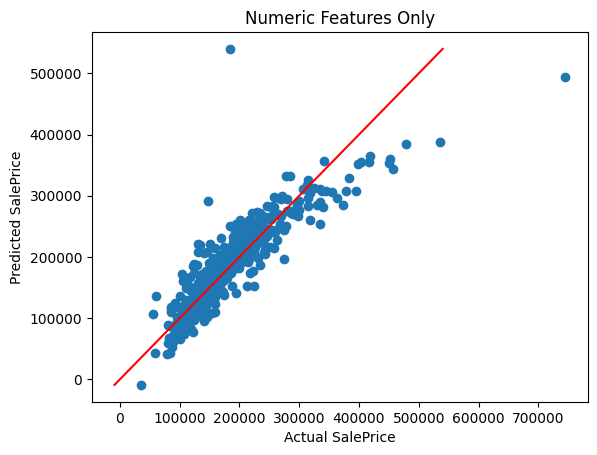

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.title('Numeric Features Only')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

The trained model has an RMSE of 35949.16, meaning an error of almost 36K in pricing a house.

The RMSEP is 21.68%.

The CV RMSE is 34286.93 (roughly the same as the trained model).

In [ ]:
model_perf_df.loc['Numeric Only'] = [rmse, rmspe, cv_rmse]
model_perf_df

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488


#### Residual Analysis

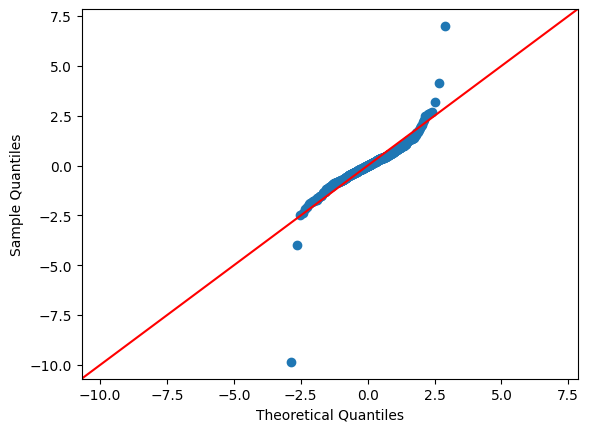

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

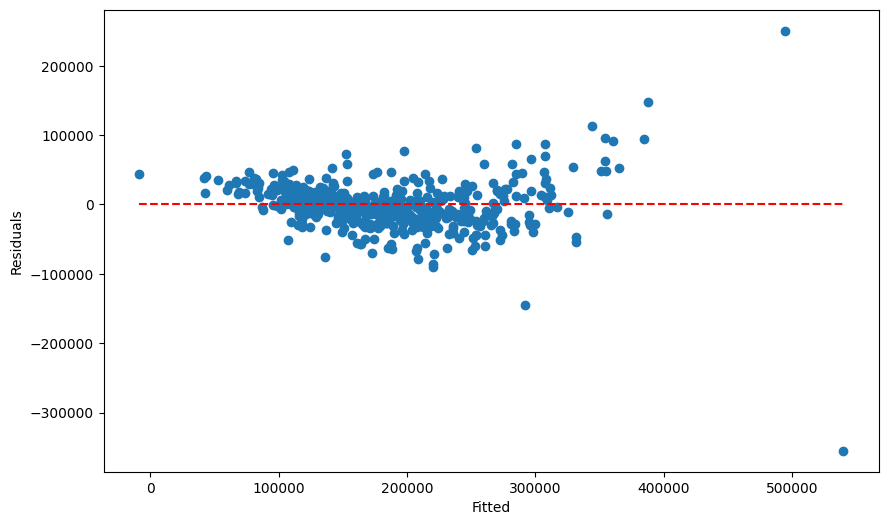

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

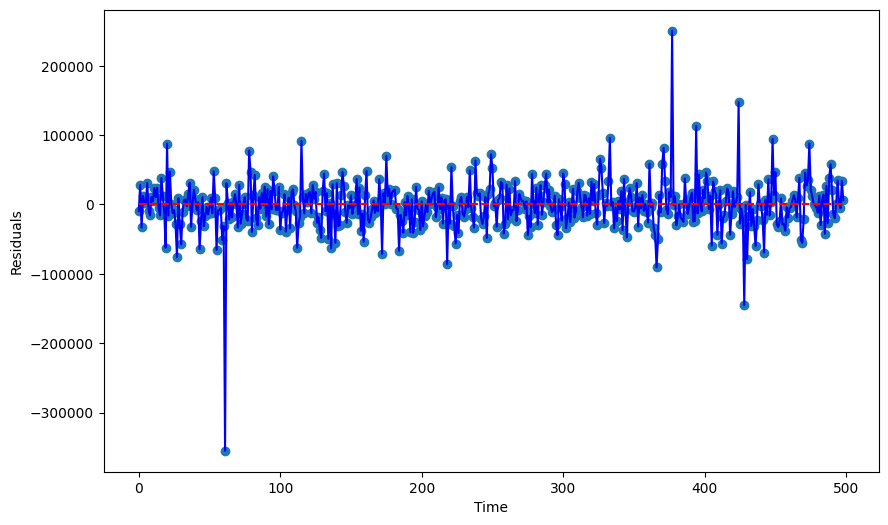

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

### \#2 - Train With Numeric & Sale Price 100K-400K

When we analyzed the values in the `SalePrice` column we found that values were concentrated around the 100-400K price range. So this training is done to see if a model with better predictions can be trained.

In [ ]:
# First we will break up our data into features and target
X = sale_100k_400k_numeric_train_df.drop(target_column, axis = 1).copy()
y = sale_100k_400k_numeric_train_df[target_column_name]

In [ ]:
(X.shape, y.shape)

((2299, 7), (2299,))

In [ ]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add
0,4,1005,2.0,1005.0,1964,1,1964
2,6,1375,1.0,780.0,1937,1,1950
3,8,1848,2.0,975.0,2000,2,2000
4,7,1135,2.0,560.0,1936,1,2007
5,5,912,1.0,912.0,1967,1,1967


In [ ]:
y.head()

0    115400
2    141000
3    254000
4    155000
5    125000
Name: SalePrice, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Fit a linear model using Sklearn
model_2 = LinearRegression()
my_fit_2 = model_2.fit(X_train, y_train)
my_fit_2_details = ( my_fit_2.intercept_, my_fit_2.coef_ )
my_fit_2_details

(-1158469.0355101102,
 array([18845.45118828,    46.50731043, 13567.06121002,    26.51523979,
          255.60774323, -7621.07428921,   306.02758779]))

In [ ]:
# See how well our model performs on our test data
y_pred = my_fit_2.predict(X_test)

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 29438.54531793263


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 14.839635911511515


#### Cross Validation

In [ ]:
results = cross_val_score(model_2, X, y, scoring=scoring, cv=cv)
cv_rmse = abs(results.mean())
print(f"CV RMSE: {cv_rmse}")

CV RMSE: 29261.53568742921


#### Results

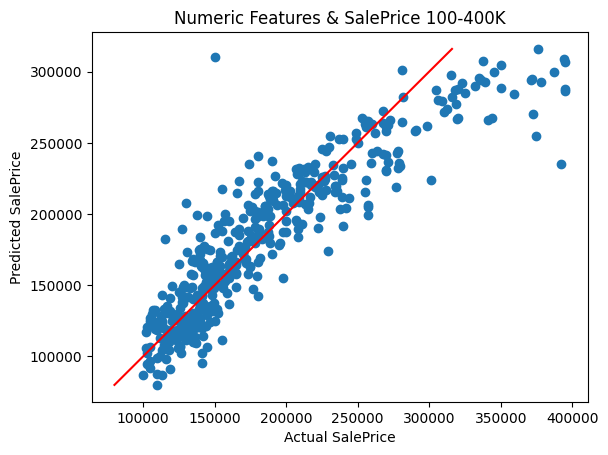

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.title('Numeric Features & SalePrice 100-400K')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

The trained model has an RMSE of 29438.54, meaning an error of almost 29.5K in pricing a house.

The RMSEP is 14.83%.

The CV RMSE is 29261.53 (roughly the same as the trained model).

**This model has performed better than the previous one. Meaning we are better at predicting SalePrice between 100-400K**

In [ ]:
model_perf_df.loc['Numeric Only Sale-100-400K'] = [rmse, rmspe, cv_rmse]
model_perf_df

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488
Numeric Only Sale-100-400K,29438.545318,14.839636,29261.535687


#### Residual Analysis

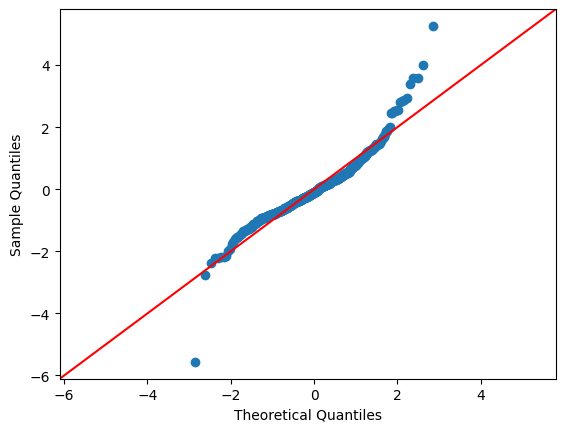

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

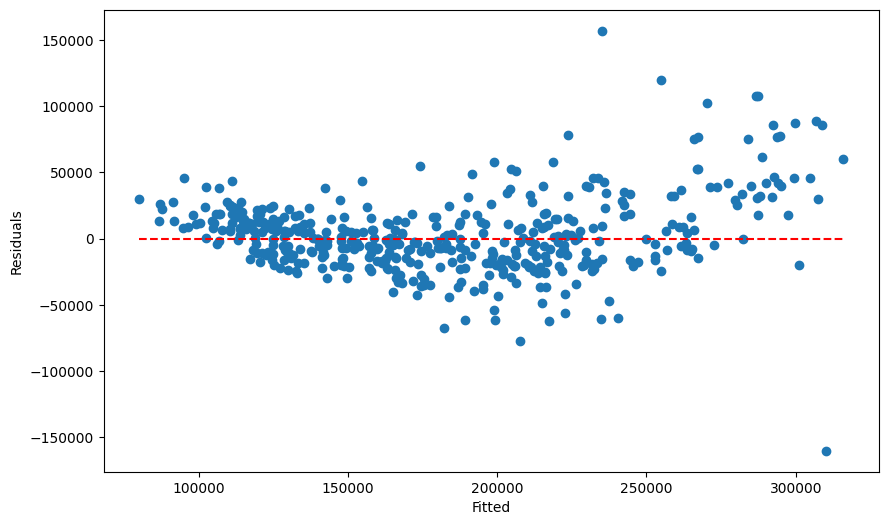

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

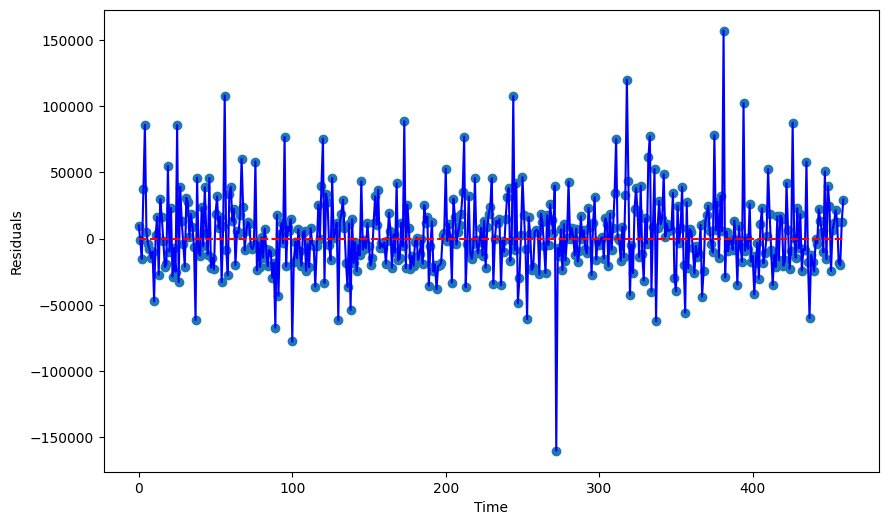

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

### \#3 - Train With All Selected Features

In [ ]:
# First we will break up our data into features and target
X = full_train_df.drop(target_column, axis = 1).copy()
y = full_train_df[target_column_name]

(X.shape, y.shape)

((2491, 26), (2491,))

In [ ]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,Exter Qual Encoded,Kitchen Qual Encoded,Bsmt Qual Encoded,...,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,4,1005,2.0,1005.0,1964,1,1964,3,3,5,...,0,0,0,0,3,0,0,1,0,0
1,4,1296,2.0,0.0,1967,2,1967,3,3,3,...,0,0,0,0,3,0,0,1,0,0
2,6,1375,1.0,780.0,1937,1,1950,3,2,5,...,0,0,0,0,3,0,0,1,0,0
3,8,1848,2.0,975.0,2000,2,2000,2,2,2,...,1,1,1,0,0,0,0,1,0,1
4,7,1135,2.0,560.0,1936,1,2007,2,2,2,...,0,0,0,0,3,0,0,1,0,1


In [ ]:
y.head()

0    115400
1     90000
2    141000
3    254000
4    155000
Name: SalePrice, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Fit a linear model using Sklearn
model_3 = LinearRegression()
my_fit_3 = model_3.fit(X_train, y_train)
my_fit_3_details = ( my_fit_3.intercept_, my_fit_3.coef_ )
my_fit_3_details

(-421120.1832204071,
 array([ 14681.09930834,     62.95543981,  13068.4972308 ,     21.30899891,
            84.82905524, -11516.43621855,    132.92918048,  -9817.04381332,
        -11632.94304192,  -2669.44006601,   1557.6566224 ,   -847.49951575,
          9742.74930325,   7551.26508773,   4050.47097427,  15871.58488044,
         -9919.41423679,   7124.48539448,  14127.4541297 ,  13818.05329793,
         -2487.44041472,   9240.02448322,  -5593.13085004,   6910.1214747 ,
         16796.8908314 , -11957.85084703]))

In [ ]:
# See how well our model performs on our test data
y_pred = my_fit_3.predict(X_test)

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 34019.608257990134


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 21.119668954500163


#### Cross Validation

In [ ]:
results = cross_val_score(model_3, X, y, scoring=scoring, cv=cv)
cv_rmse = abs(results.mean())
print(f"CV RMSE: {cv_rmse}")

CV RMSE: 31699.949821864382


#### Results

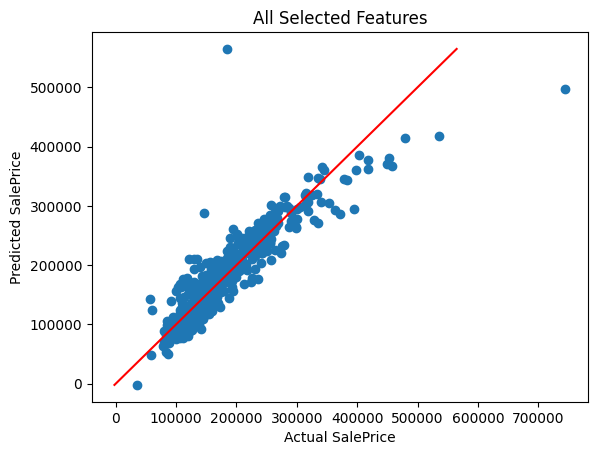

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.title('All Selected Features')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

The trained model has an RMSE of 34019.60, meaning an error of almost 34K in pricing a house.

The RMSEP is 21.11%.

The CV RMSE is 31699.94 (10% lower than initial).

***This model has performed very similarly to the first model where only numeric features were used and no restriction on the sale-price.***

In [ ]:
model_perf_df.loc['All Selected Features'] = [rmse, rmspe, cv_rmse]
model_perf_df

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488
Numeric Only Sale-100-400K,29438.545318,14.839636,29261.535687
All Selected Features,34019.608258,21.119669,31699.949822


#### Residual Analysis

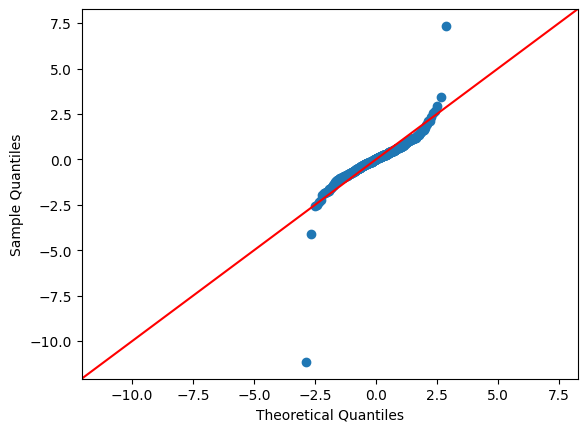

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

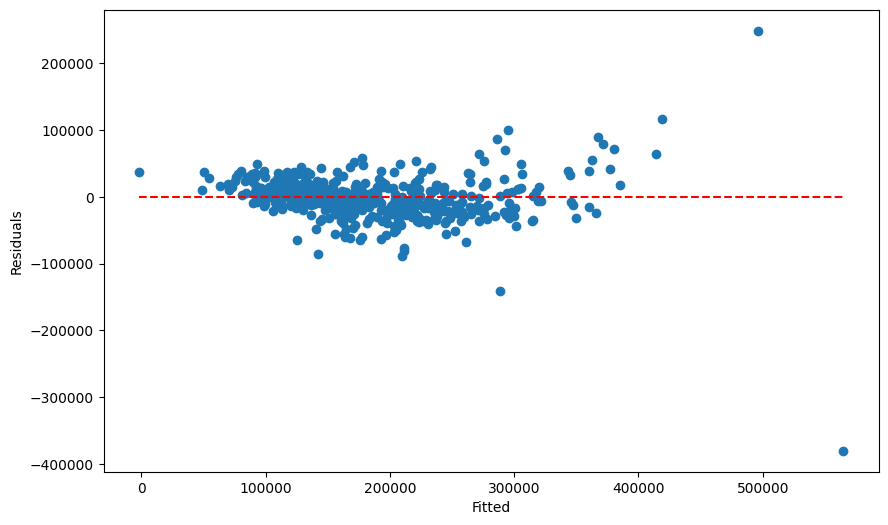

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;


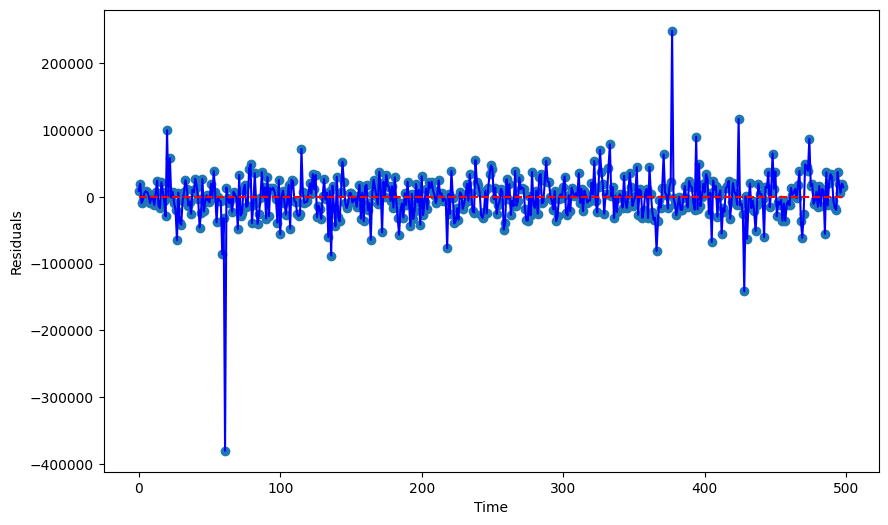

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

### \#4 - Train With All Selected Features & Sale Price 100K-400K

In [ ]:
# First we will break up our data into features and target
X = sale_100k_400k_full_train_df.drop(target_column, axis = 1).copy()
y = sale_100k_400k_full_train_df[target_column_name]
(X.shape, y.shape)

((2299, 26), (2299,))

In [ ]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,Exter Qual Encoded,Kitchen Qual Encoded,Bsmt Qual Encoded,...,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,4,1005,2.0,1005.0,1964,1,1964,3,3,5,...,0,0,0,0,3,0,0,1,0,0
2,6,1375,1.0,780.0,1937,1,1950,3,2,5,...,0,0,0,0,3,0,0,1,0,0
3,8,1848,2.0,975.0,2000,2,2000,2,2,2,...,1,1,1,0,0,0,0,1,0,1
4,7,1135,2.0,560.0,1936,1,2007,2,2,2,...,0,0,0,0,3,0,0,1,0,1
5,5,912,1.0,912.0,1967,1,1967,3,3,5,...,0,0,0,0,3,0,0,1,0,0


In [ ]:
y.head()

0    115400
2    141000
3    254000
4    155000
5    125000
Name: SalePrice, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Fit a linear model using Sklearn
model_4 = LinearRegression()
my_fit_4 = model_4.fit(X_train, y_train)
my_fit_4_details = ( my_fit_4.intercept_, my_fit_4.coef_ )
my_fit_4_details

(-350149.9037406569,
 array([ 1.40646860e+04,  4.80626997e+01,  1.41160952e+04,  1.34264321e+01,
         3.37047085e+01, -7.07433758e+03,  1.53731591e+02, -5.90293709e+03,
        -9.53339968e+03, -3.01904821e+03,  7.24954560e+03, -1.59475718e+03,
         5.25953448e+03,  6.92050685e+03,  1.13496981e+04,  4.50357301e+03,
        -9.22548544e+03,  8.52529954e+03,  1.47102858e+04,  8.06799525e+03,
        -2.78254067e+03,  9.29583813e+03,  1.17077459e+02,  1.31769181e+03,
         1.33999945e+04, -9.31797609e+03]))

In [ ]:
# See how well our model performs on our test data
y_pred = my_fit_4.predict(X_test)

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 27987.632276871384


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 14.218258175230641


#### Cross Validation

In [ ]:
results = cross_val_score(model_4, X, y, scoring=scoring, cv=cv)
cv_rmse = abs(results.mean())
print(f"CV RMSE: {cv_rmse}")

CV RMSE: 27478.63533112099


#### Results

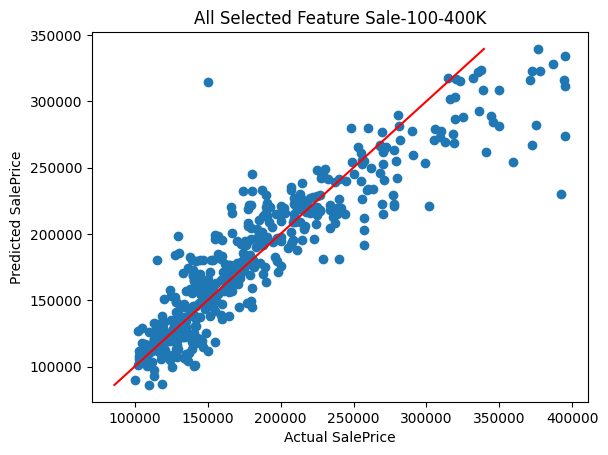

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.title('All Selected Feature Sale-100-400K')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

This trained model has an RMSE of 27987.63, meaning an error of almost 28K in pricing a house.

The RMSEP is 14.21%.

The CV RMSE is 27478.63 (roughly the same as the trained model).

***This model has only performed slightly better than the model trained with all numeric data and sale price restricted to 100-400K. Raises the question if it was worth processing the categorical data.***

In [ ]:
model_perf_df.loc['All Selected Feature Sale-100-400K'] = [rmse, rmspe, cv_rmse]
model_perf_df

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488
Numeric Only Sale-100-400K,29438.545318,14.839636,29261.535687
All Selected Features,34019.608258,21.119669,31699.949822
All Selected Feature Sale-100-400K,27987.632277,14.218258,27478.635331


#### Residual Analysis

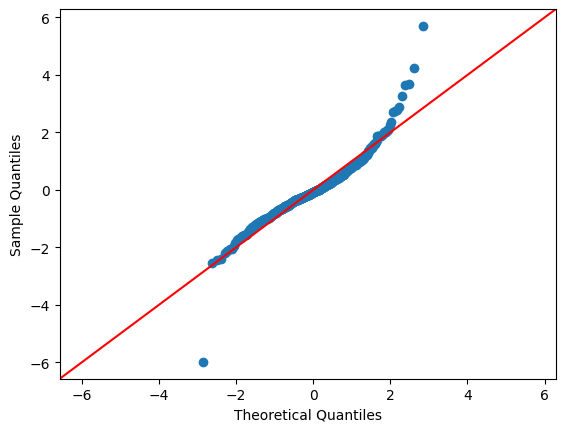

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

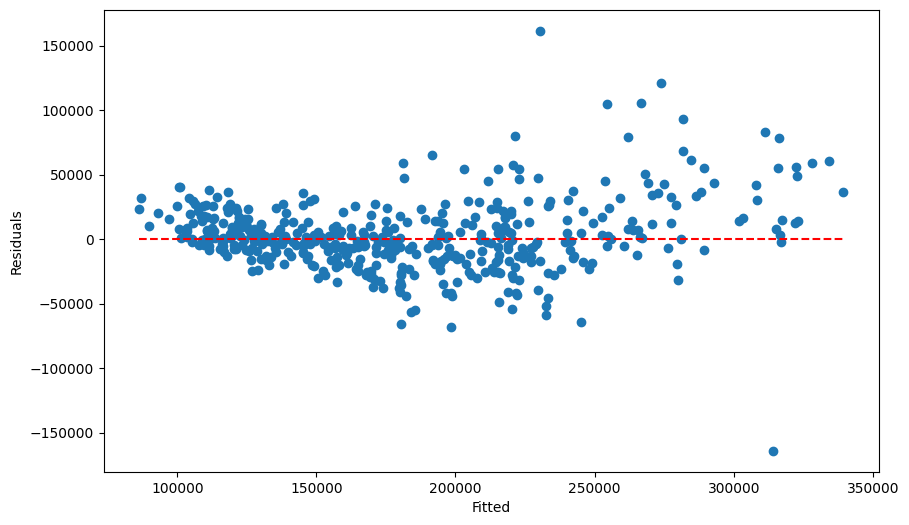

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

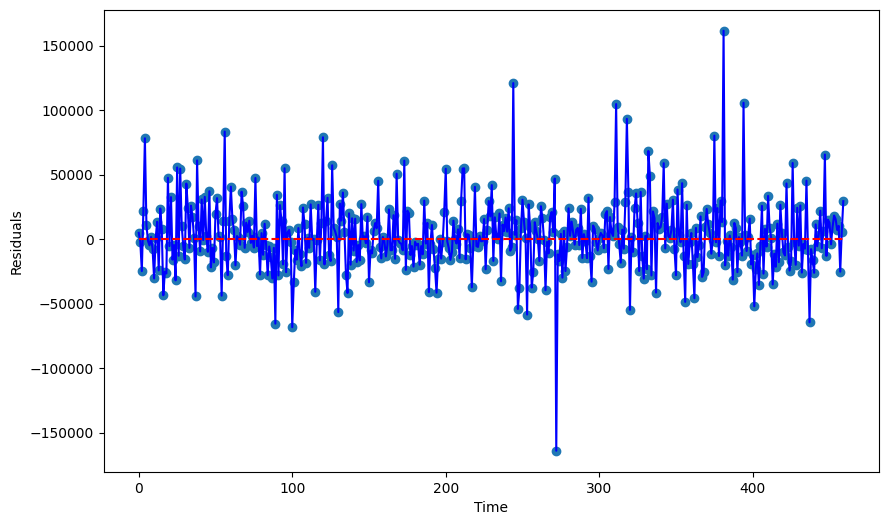

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

Of the four models trained above the last one, All Selected Features + SalePrice between 100-400K performed the best. Let us use this as our base model and apply regularization to it.

In [ ]:
# Create a data frame with the coeff from the linear regression models
model_coeff = pd.DataFrame()
model_coeff['Predictor'] = X_train.columns
model_coeff['Linear'] =  my_fit_4.coef_
model_coeff.sort_values(by=['Linear'],inplace=True, ascending=False)
model_coeff

,Predictor,Linear
18,Garage Type_Attchd,14710.285821
2,Garage Cars,14116.095195
0,Overall Qual,14064.685957
24,Garage Type_BuiltIn,13399.994469
14,Foundation_CBlock,11349.698145
21,Mas Vnr Type_BrkFace,9295.838134
17,Exterior 2nd_VinylSd,8525.299542
19,Mas Vnr Type_Stone,8067.995252
10,Foundation_PConc,7249.545601
13,Mas Vnr Type_None,6920.506848


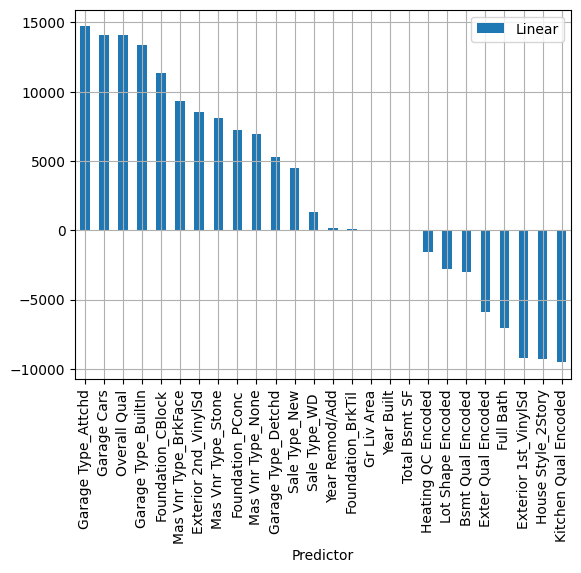

In [ ]:
model_coeff.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()

## Regularization

Regularization was done on the data that contained all selected features and the sale price restricted to 100K-400K.

This was the best performing linear regression model eventhough it was only slightly better than the data containing numeric only.

### Scale Data

In [ ]:
scaler = StandardScaler()

In [ ]:
# First we will break up our data into features and target
X = sale_100k_400k_full_train_df.drop(target_column, axis = 1).copy()
y = sale_100k_400k_full_train_df[target_column_name]
(X.shape, y.shape)

((2299, 26), (2299,))

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,Exter Qual Encoded,Kitchen Qual Encoded,Bsmt Qual Encoded,...,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,4,1005,2.0,1005.0,1964,1,1964,3,3,5,...,0,0,0,0,3,0,0,1,0,0
2,6,1375,1.0,780.0,1937,1,1950,3,2,5,...,0,0,0,0,3,0,0,1,0,0
3,8,1848,2.0,975.0,2000,2,2000,2,2,2,...,1,1,1,0,0,0,0,1,0,1
4,7,1135,2.0,560.0,1936,1,2007,2,2,2,...,0,0,0,0,3,0,0,1,0,1
5,5,912,1.0,912.0,1967,1,1967,3,3,5,...,0,0,0,0,3,0,0,1,0,0


In [ ]:
X_scaled.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Year Remod/Add,Exter Qual Encoded,Kitchen Qual Encoded,Bsmt Qual Encoded,...,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Garage Type_Attchd,Mas Vnr Type_Stone,Lot Shape Encoded,Mas Vnr Type_BrkFace,Foundation_BrkTil,Sale Type_WD,Garage Type_BuiltIn,House Style_2Story
0,-1.806621,-1.127026,0.198340,-0.162295,-0.364419,-1.084558,-1.090058,0.715248,0.826409,1.086415,...,-0.760197,-0.751672,-1.366230,-0.312049,0.800167,-0.682788,-0.306987,0.378434,-0.265138,-0.671173
1,-0.193955,-0.317116,-1.396011,-0.730448,-1.313705,-1.084558,-1.789680,0.715248,-0.456450,1.086415,...,-0.760197,-0.751672,-1.366230,-0.312049,0.800167,-0.682788,-0.306987,0.378434,-0.265138,-0.671173
2,1.418711,0.718255,0.198340,-0.238048,0.901297,0.767893,0.708968,-0.812964,-0.456450,-0.661428,...,1.315448,1.330368,0.731941,-0.312049,-1.287106,-0.682788,-0.306987,0.378434,-0.265138,1.489929
3,0.612378,-0.842463,0.198340,-1.285976,-1.348864,-1.084558,1.058779,-0.812964,-0.456450,-0.661428,...,-0.760197,-0.751672,-1.366230,-0.312049,0.800167,-0.682788,-0.306987,0.378434,-0.265138,1.489929
4,-1.000288,-1.330598,-1.396011,-0.397131,-0.258942,-1.084558,-0.940139,0.715248,0.826409,1.086415,...,-0.760197,-0.751672,-1.366230,-0.312049,0.800167,-0.682788,-0.306987,0.378434,-0.265138,-0.671173


In [ ]:
# Note we are using the same random state value here as we did in Training #4.
# This means the data in the training set here will be the same as Training #4, just that it will be scaled.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

### Ridge Regression

In [ ]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;
my_fit_rr_details = ( my_fit_rr.intercept_, my_fit_rr.coef_ )
my_fit_rr_details

(183949.59020578896,
 array([17432.4069308 , 21916.1962835 ,  8850.4708292 ,  5345.38393535,
          952.7768925 , -3800.94542369,  3075.6073529 , -3866.61423824,
        -7431.51295951, -5178.19834542,  3513.08621224, -2755.75112204,
         2258.39303211,  3307.3787111 ,  5503.64619916,  1239.24072812,
        -4338.99537857,  3990.2992428 ,  6954.44184236,  2231.6512932 ,
        -3999.57370358,  4233.67749992,   -22.57413852,   434.54742028,
         3294.25547333, -4284.14506383]))

In [ ]:
y_pred = my_fit_rr.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 27988.581901505768


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 14.216504238067301


Let's try looking at different values of $\alpha$.

In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring=scoring,
      cv=cv
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

           Alpha          RMSE
14  3.000000e+01  27454.370512
15  5.000000e+01  27456.741302
13  2.000000e+01  27457.081584
12  1.000000e+01  27464.122869
11  5.000000e+00  27470.125457
10  4.000000e+00  27471.597904
9   3.000000e+00  27473.176529
8   2.000000e+00  27474.869448
7   1.000000e+00  27476.685690
6   1.000000e-01  27478.434053
5   1.000000e-02  27478.615138
4   1.000000e-03  27478.633311
3   1.000000e-04  27478.635129
2   1.000000e-08  27478.635331
1   1.000000e-10  27478.635331
0   1.000000e-15  27478.635331


It looks like 30 gives us the smallest RMSE.

In [ ]:
# Retrain the model w/ alpha = 30
my_fit_rr = Ridge(alpha = 30)
my_fit_rr.fit(X_train, y_train)
my_fit_rr_details = ( my_fit_rr.intercept_, my_fit_rr.coef_ )
my_fit_rr_details

(183935.77554120362,
 array([17087.86733327, 20927.22383292,  8767.99456681,  5938.98500277,
          788.8628441 , -3314.21671939,  3056.68785744, -4011.34924132,
        -7431.87052895, -5097.52373593,  1798.87761424, -2727.84877967,
         1037.50784184,  1653.46129188,  3656.89829686,  1206.05523208,
        -2611.16235447,  2277.88004917,  5700.73475328,  1249.62868628,
        -4006.37512691,  2736.46919783,  -908.46761989,   386.99863093,
         2739.97180751, -3650.63326999]))

In [ ]:
y_pred = my_fit_rr.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 28037.244857638863


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE: {rmspe}")

RMSPE: 14.180750081403565


In [ ]:
# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring=scoring, cv=cv)
cv_rmse = abs(results.mean())
print(f"CV RMSE: {cv_rmse}")

CV RMSE: 27454.37051173385


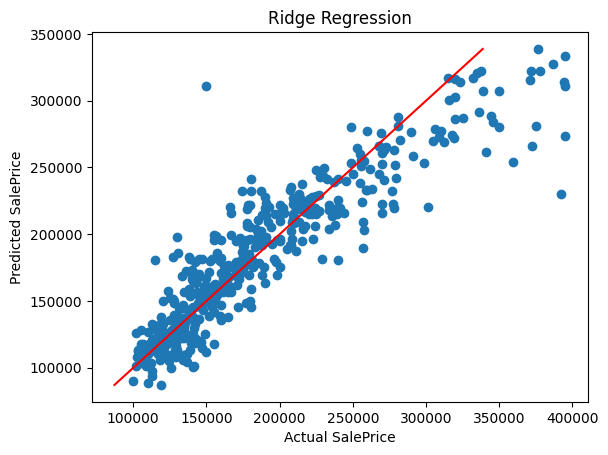

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.title('Ridge Regression')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [ ]:
model_perf_df.loc['Ridge + All Selected Feature Sale-100-400K'] = [rmse, rmspe, cv_rmse]
model_perf_df

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488
Numeric Only Sale-100-400K,29438.545318,14.839636,29261.535687
All Selected Features,34019.608258,21.119669,31699.949822
All Selected Feature Sale-100-400K,27987.632277,14.218258,27478.635331
Ridge + All Selected Feature Sale-100-400K,28037.244858,14.180750,27454.370512


In [ ]:
# Add ridge regression results to data frame we created earlier
model_coeff['Ridge'] = my_fit_rr.coef_
model_coeff

,Predictor,Linear,Ridge
18,Garage Type_Attchd,14710.285821,17087.867333
2,Garage Cars,14116.095195,20927.223833
0,Overall Qual,14064.685957,8767.994567
24,Garage Type_BuiltIn,13399.994469,5938.985003
14,Foundation_CBlock,11349.698145,788.862844
21,Mas Vnr Type_BrkFace,9295.838134,-3314.216719
17,Exterior 2nd_VinylSd,8525.299542,3056.687857
19,Mas Vnr Type_Stone,8067.995252,-4011.349241
10,Foundation_PConc,7249.545601,-7431.870529
13,Mas Vnr Type_None,6920.506848,-5097.523736


### Lasso Regression

In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring=scoring,
      cv=cv
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.969e+11, tolerance: 7.071e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e+11, tolerance: 8.670e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.507e+11, tolerance: 8.711e

           Alpha          RMSE
14  3.000000e+01  27467.772622
13  2.000000e+01  27471.405330
15  5.000000e+01  27472.378497
12  1.000000e+01  27474.882965
11  5.000000e+00  27476.128524
10  4.000000e+00  27476.395138
9   3.000000e+00  27476.678611
8   2.000000e+00  27476.981283
7   1.000000e+00  27477.301891
6   1.000000e-01  27477.609120
5   1.000000e-02  27477.637944
4   1.000000e-03  27477.640824
3   1.000000e-04  27477.641113
2   1.000000e-08  27477.641145
1   1.000000e-10  27477.641145
0   1.000000e-15  27477.641145


<Axes: xlabel='Alpha'>

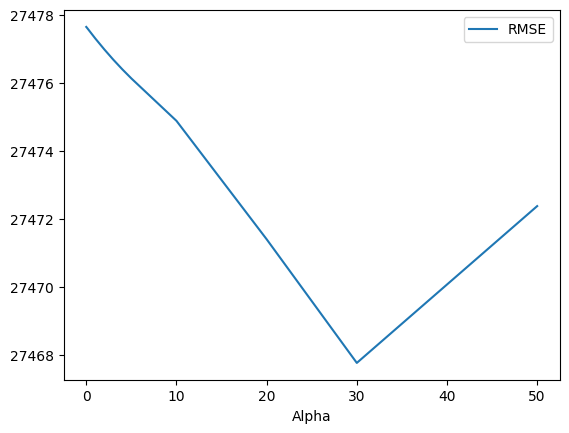

In [ ]:
results_df.plot('Alpha', 'RMSE')

It looks like 30 gives us the smallest RMSE.

In [ ]:
# Train the model
my_fit_lasso = Lasso(alpha = 30, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)
my_fit_lasso_details = ( my_fit_lasso.intercept_, my_fit_lasso.coef_ )
my_fit_lasso_details

(183939.30918848162,
 array([17502.98796081, 21731.85378905,  8819.88613856,  5486.86263166,
          915.22079939, -3699.94803359,  3060.46543527, -3828.19090369,
        -7433.93113631, -5149.15122758,  2778.16839411, -2717.74836441,
         1729.81703909,  1320.04937056,  4722.87568846,  1130.09000666,
        -2761.4033478 ,  2464.84293188,  6408.76187307,  1020.43216924,
        -3975.99980284,  2364.3059683 ,  -378.51100222,   306.64989583,
         2996.77661631, -4131.81323599]))

In [ ]:
y_pred = my_fit_lasso.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 27987.173815115486


In [ ]:
# RMSPE
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSE: {rmspe}")

RMSE: 14.216263212285671


In [ ]:
# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring=scoring, cv=cv)
cv_rmse = abs(results.mean())
print(f"CV RMSE: {cv_rmse}")

CV RMSE: 27467.772621913173


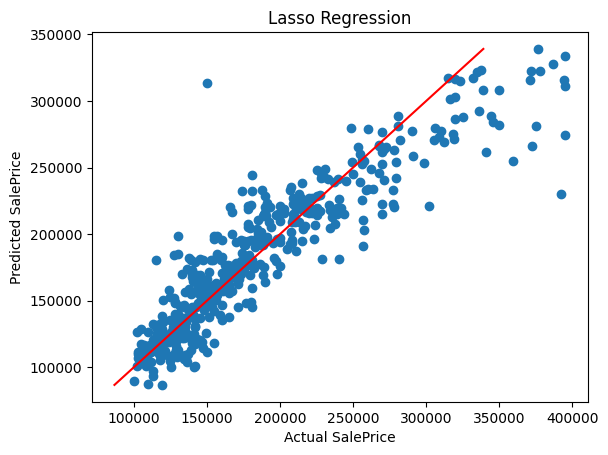

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.title('Lasso Regression')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [ ]:
model_perf_df.loc['Lasso + All Selected Feature Sale-100-400K'] = [rmse, rmspe, cv_rmse]
model_perf_df

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488
Numeric Only Sale-100-400K,29438.545318,14.839636,29261.535687
All Selected Features,34019.608258,21.119669,31699.949822
All Selected Feature Sale-100-400K,27987.632277,14.218258,27478.635331
Ridge + All Selected Feature Sale-100-400K,28037.244858,14.180750,27454.370512
Lasso + All Selected Feature Sale-100-400K,27987.173815,14.216263,27467.772622


In [ ]:
# Add Lasso results to the data frame we created before
model_coeff['Lasso'] = my_fit_lasso.coef_
model_coeff

,Predictor,Linear,Ridge,Lasso
18,Garage Type_Attchd,14710.285821,17087.867333,17502.987961
2,Garage Cars,14116.095195,20927.223833,21731.853789
0,Overall Qual,14064.685957,8767.994567,8819.886139
24,Garage Type_BuiltIn,13399.994469,5938.985003,5486.862632
14,Foundation_CBlock,11349.698145,788.862844,915.220799
21,Mas Vnr Type_BrkFace,9295.838134,-3314.216719,-3699.948034
17,Exterior 2nd_VinylSd,8525.299542,3056.687857,3060.465435
19,Mas Vnr Type_Stone,8067.995252,-4011.349241,-3828.190904
10,Foundation_PConc,7249.545601,-7431.870529,-7433.931136
13,Mas Vnr Type_None,6920.506848,-5097.523736,-5149.151228


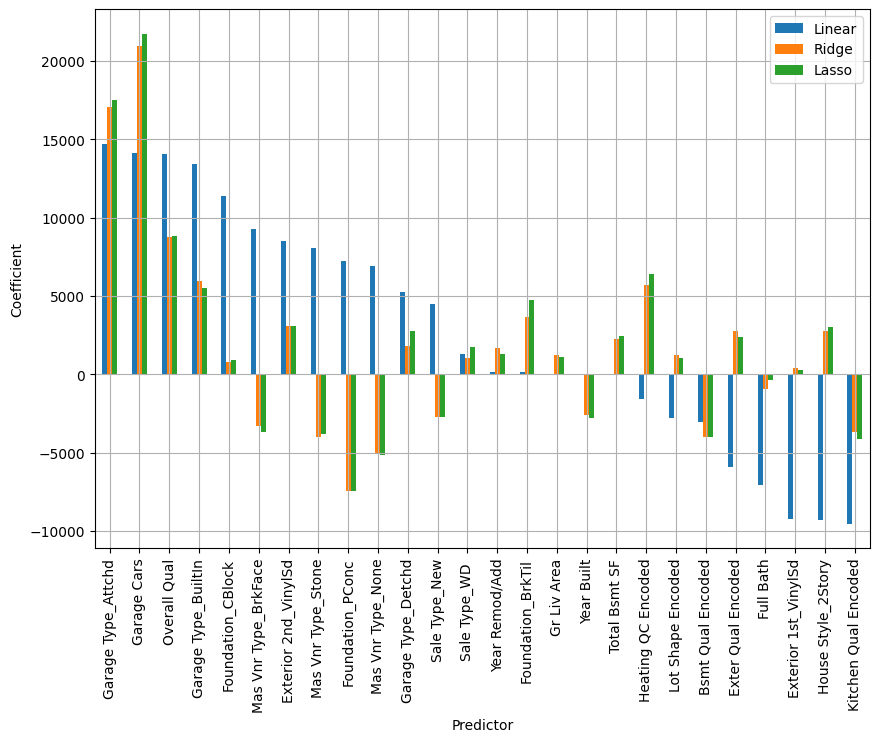

In [ ]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_coeff.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

## Conclusion

In [ ]:
model_perf_df.sort_values(by='RMSE %', ascending=False)

,RMSE,RMSE %,CV-RMSE
Numeric Only,35949.169916,21.686114,34286.937488
All Selected Features,34019.608258,21.119669,31699.949822
Numeric Only Sale-100-400K,29438.545318,14.839636,29261.535687
All Selected Feature Sale-100-400K,27987.632277,14.218258,27478.635331
Lasso + All Selected Feature Sale-100-400K,27987.173815,14.216263,27467.772622
Ridge + All Selected Feature Sale-100-400K,28037.244858,14.180750,27454.370512


*   Model performs better when trained with data where the house sale price is between 100-400K
*   Training with numeric only data gives us good performance when compared to the work needed to wrangle the categorical data to prepare it towards training the model.
* Ridge + All Selected & Encoded Features + Sale Price 100-400K gives us the best performing model overall.
  * This model was trained with 26 features.

